In [1]:
import os
# os.chdir('/home/rm/ssd2/langcao/workspace/tablemaster')
os.chdir('/Users/windsovo/Projects/TableMaster/workspace/tablemaster-main')
!pwd

/Users/windsovo/Projects/TableMaster/workspace/tablemaster-main


In [2]:
import os
import sys
import json
import glob
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append('./')
from evaluate.evaluator import eval_qa, eval_fact

In [4]:
method = 'tablemaster-4m'


for dataset in ['wikitq', 'tabfact']:

    print(f'{dataset}...')
    topheaders_list = []
    selected_column_indices_list = []
    final_selected_column_indices_list = []

    files = glob.glob(f'outputs/main/{dataset}/{method}/*.json')

    files = sorted(files, key=lambda x: int(x.split('/')[-1].split('.')[0]))
    for file in tqdm(files):
        with open(file, 'r') as f:
            D = json.load(f)

        reasoning_process = D['reasoning_process']
        topheaders = reasoning_process['topheaders']
        selected_column_indices = reasoning_process['selected_column_indices']
        final_selected_column_indices = reasoning_process['final_selected_column_indices']

        topheaders_list.append(len(topheaders))
        selected_column_indices_list.append(len(selected_column_indices))
        final_selected_column_indices_list.append(len(final_selected_column_indices))

    number_0 = sum(selected_column_indices_list) / len(selected_column_indices_list)
    number_1 = sum(final_selected_column_indices_list) / len(final_selected_column_indices_list)
    percentage_list_0 = [x / y for x, y in zip(selected_column_indices_list, topheaders_list)]
    percentage_list_1 = [x / y for x, y in zip(final_selected_column_indices_list, topheaders_list)]
    
    percentage_0 = sum(percentage_list_0) / len(percentage_list_0)
    percentage_1 = sum(percentage_list_1) / len(percentage_list_1)

    print(f'{dataset} - number_0: {number_0}, number_1: {number_1}, percentage_0: {percentage_0}, percentage_1: {percentage_1}')


wikitq...


  0%|          | 0/4344 [00:00<?, ?it/s]

100%|██████████| 4344/4344 [00:00<00:00, 5136.03it/s]


wikitq - number_0: 2.439917127071823, number_1: 3.3404696132596685, percentage_0: 0.4073584465590647, percentage_1: 0.5464256772872101
tabfact...


100%|██████████| 2024/2024 [00:00<00:00, 5796.33it/s]

tabfact - number_0: 2.869565217391304, number_1: 4.717391304347826, percentage_0: 0.47672581727671076, percentage_1: 0.7590721846774202


In [8]:
import os
import sys
import json
import glob
from tqdm import tqdm
import numpy as np
import pandas as pd
import tiktoken
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append('./')
from evaluate.evaluator import eval_qa, eval_fact
from table_utils import format_table

In [18]:
plt.rcParams['font.family'] = 'Calibri'

methods = ['Original Table', 'Condensed Table']
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

color_mapping = {
    'Original Table': '#1f77b4',
    'Condensed Table': '#ff7f0e',
}


In [19]:
results = {
    'WikiTQ': {
        'Original Table': 714322,
        'Condensed Table': 228357,
    },
    'TabFact': {
        'Original Table': 190760,
        'Condensed Table': 100077,
    },
}

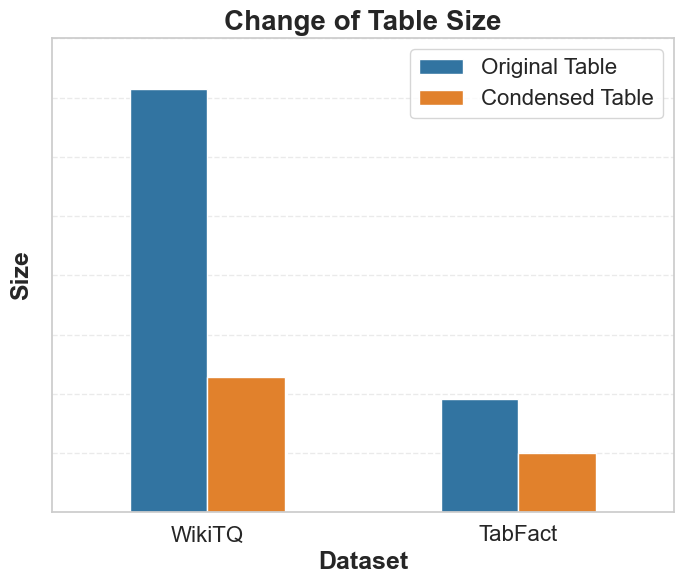

In [23]:
# Convert dictionary to DataFrame for Seaborn plotting
df = pd.DataFrame(results).reset_index().melt(id_vars='index', var_name='Dataset', value_name='Area')
df.rename(columns={'index': 'Table Type'}, inplace=True)

# Plot using Seaborn with updated aesthetics and improved transparency
fig, ax = plt.subplots(figsize=(7, 6))

sns.barplot(data=df, x="Dataset", y="Area", hue="Table Type", ax=ax, palette=color_mapping, alpha=1, width=0.5)

# Annotate each bar with the corresponding accuracy value (without '%')
# for container in ax.containers:
#     plt.bar_label(container, fmt="%.1f", label_type="edge", fontsize=14, color="black")


# Customize plot with enhanced titles and labels
sns.set_theme(style="whitegrid")
plt.title("Change of Table Size", fontsize=20, fontweight='bold')
plt.xlabel("Dataset", fontsize=18, fontweight='bold')
plt.ylabel("Size", fontsize=18, fontweight='bold')
# plt.ylim(30, 90)  # Adjusted for the accuracy range
plt.xticks(fontsize=16)
plt.yticks(ax.get_yticks(), [], fontsize=16)
plt.legend(fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Show plot with tight layout
plt.tight_layout()
plt.savefig('figures/analysis/size_analysis.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()